In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

# CSV file creation

In [ ]:
data = [
    ["KNN", "Original", 0.80, 0.73, 0.88, 0.904, 85294, 13, 37, 99],
    ["KNN", "Undersampled", 0.09, 0.98, 0.05, 0.988, 82595, 2712, 3, 133],
    ["KNN", "Oversampled", 0.01, 0.93, 0.01, 0.848, 62103, 23204, 9, 127],
    ["Logistic Regression", "Original", 0.70, 0.68, 0.72, 0.984, 85271, 36, 44, 92],
    ["Logistic Regression", "Undersampled", 0.09, 0.93, 0.05, 0.991, 82707, 2600, 9, 127],
    ["Logistic Regression", "Oversampled", 0.00, 1.00, 0.00, 0.965, 4090, 81217, 0, 136],
    ["Random Forest", "Original", 0.81, 0.77, 0.86, 0.972, 85290, 17, 31, 105],
    ["Random Forest", "Undersampled", 0.10, 0.97, 0.05, 0.994, 82865, 2442, 4, 132],
    ["Random Forest", "Oversampled", 0.06, 0.55, 0.03, 0.834, 82959, 2348, 61, 75],
    ["SVM", "Original", 0.47, 0.32, 0.86, 0.961, 85300, 7, 92, 44],
    ["SVM", "Undersampled", 0.10, 0.93, 0.05, 0.991, 83026, 2281, 10, 126],
    ["SVM", "Oversampled", 0.00, 0.02, 0.00, 0.468, 79617, 5690, 133, 3],
    ["XGBoost", "Original", 0.87, 0.82, 0.93, 0.986, 85298, 9, 25, 111],
    ["XGBoost", "Undersampled", 0.07, 0.98, 0.04, 0.995, 81771, 3536, 3, 133],
    ["XGBoost", "Oversampled", 0.76, 0.86, 0.69, 0.989, 85254, 53, 19, 117],
]

columns = ["Model", "Dataset", "F1_Score", "Recall", "Precision", "ROC_AUC", "TN", "FP", "FN", "TP"]
df = pd.DataFrame(data, columns=columns)

df.to_csv("fraud_detection_model_results.csv", index=False)

---

# Analysis of results

In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

df = pd.read_csv("fraud_detection_model_results.csv")

## 1. F1-Score by Model and Dataset Type

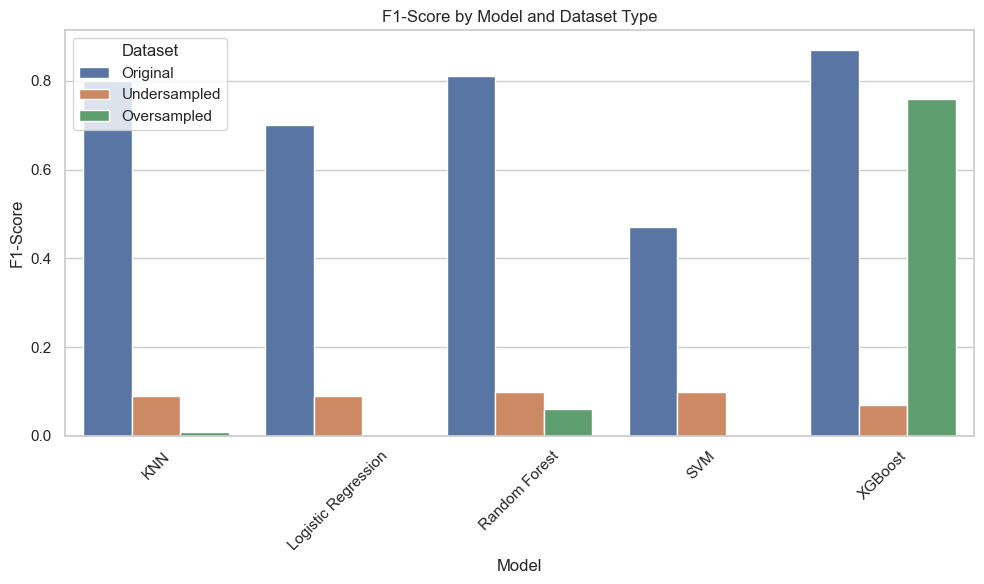

In [ ]:
plt.figure()
sns.barplot(data=df, x="Model", y="F1_Score", hue="Dataset")
plt.title("F1-Score by Model and Dataset Type")
plt.ylabel("F1-Score")
plt.xticks(rotation=45)
plt.legend(title="Dataset")
plt.tight_layout()

## 2. Recall and Precision by Model and Dataset type

C:\Users\hugop\AppData\Local\Temp\ipykernel_27732\788320537.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(df["Model"].unique(), rotation=45)
C:\Users\hugop\AppData\Local\Temp\ipykernel_27732\788320537.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(df["Model"].unique(), rotation=45)


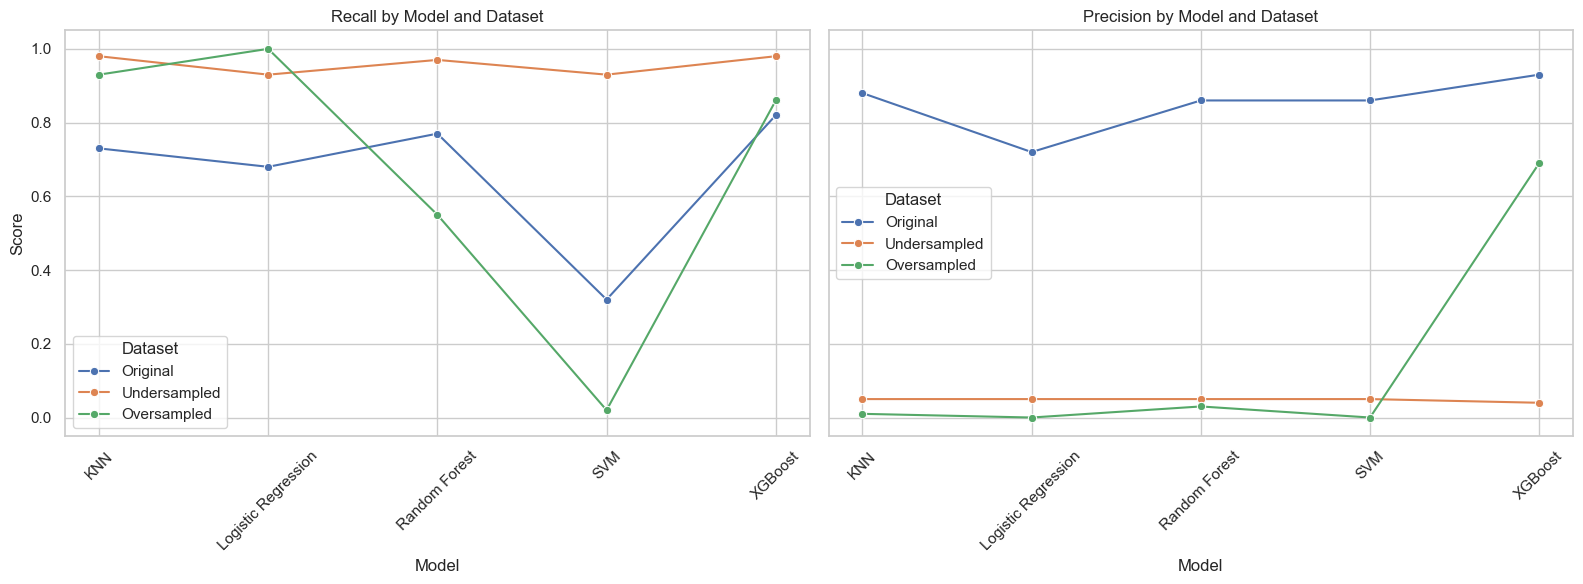

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.lineplot(data=df, x="Model", y="Recall", hue="Dataset", marker="o", ax=ax[0])
ax[0].set_title("Recall by Model and Dataset")
ax[0].set_ylabel("Score")
ax[0].set_xticklabels(df["Model"].unique(), rotation=45)

sns.lineplot(data=df, x="Model", y="Precision", hue="Dataset", marker="o", ax=ax[1])
ax[1].set_title("Precision by Model and Dataset")
ax[1].set_ylabel("Score")
ax[1].set_xticklabels(df["Model"].unique(), rotation=45)

plt.tight_layout()

## 3. Scatter ROC AUC vs F1-Score

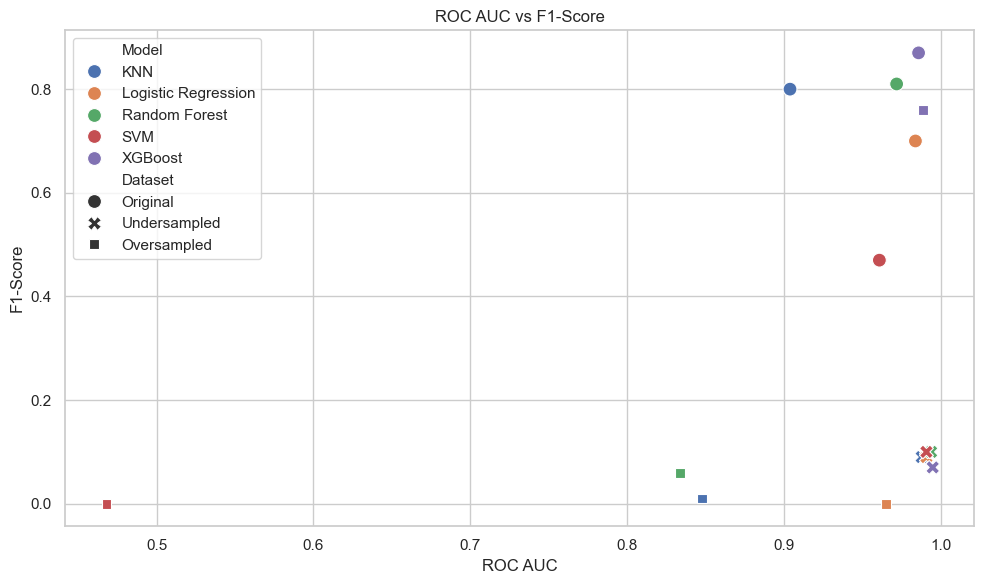

In [ ]:
plt.figure()
sns.scatterplot(data=df, x="ROC_AUC", y="F1_Score", hue="Model", style="Dataset", s=100)
plt.title("ROC AUC vs F1-Score")
plt.xlabel("ROC AUC")
plt.ylabel("F1-Score")
plt.grid(True)
plt.tight_layout()

---

# Final observations

- **F1-Score Trends**

    XGBoost consistently achieves the highest F1-Score on the original and oversampled datasets, indicating a strong balance between precision and recall.

    KNN, Logistic Regression, and Random Forest also perform relatively well on the original dataset, with F1-Scores above 0.70.

    Undersampling severely impacts precision across nearly all models, leading to extremely low F1-Scores despite high recall.

    Oversampling generally improves recall but often degrades precision dramatically—especially for simpler models like Logistic Regression and KNN.


- **Recall vs. Precision**

    All models on undersampled data achieve very high recall, but this comes at the expense of extremely poor precision, resulting in numerous false positives.

    Original datasets strike a better trade-off: reasonable recall with high precision, especially for XGBoost, Random Forest, and Logistic Regression.

    Oversampled datasets show unstable behavior: some models (e.g., XGBoost) handle it well, while others (e.g., SVM, Logistic Regression) suffer from very poor precision.


- **ROC AUC vs. F1-Score**

    High ROC AUC does not always correlate with a high F1-Score, especially in imbalanced datasets.

    For example, some undersampled models reach ROC AUCs near 0.99 but still have F1-Scores close to 0.05–0.10, highlighting the limitations of relying solely on ROC AUC in imbalanced settings.


**Conclusion**

Among all tested models and sampling strategies, XGBoost on the original dataset delivers the most balanced and effective performance, achieving high precision, strong recall, and the best F1-Score overall. While undersampling increases sensitivity (recall), it does so at the cost of excessive false positives, making it impractical for real-world fraud detection. Oversampling can help in some cases (e.g., XGBoost), but its success depends heavily on the model's capacity to generalize. Overall, the results emphasize the importance of model choice and careful handling of class imbalance in fraud detection tasks.